# Ex3 - Getting and Knowing your Data

### Step 1. Go to https://www.kaggle.com/openfoodfacts/world-food-facts/data

### Step 2. Download the dataset to your computer and unzip it.

### Step 3. Use the tsv file and assign it to a dataframe called food

### Step1 Import Libraries

In [167]:
# data frame subsetting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### Step2 Load Data

In [108]:
food = pd.read_table("en.openfoodfacts.org.products.tsv")
food = food.sample(frac=0.4)

C:\Users\hp\AppData\Local\Temp\ipykernel_24836\3793708267.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  food = pd.read_table("en.openfoodfacts.org.products.tsv")


### Step3 shape of data

In [109]:
# Step1:  Data shape
rows, columns= food.shape
print(rows, columns)
# food.shape[1]

142411 163


In [111]:
rows = food.shape[0]
columns = food.shape[1]
rows, columns

(142411, 163)

### Step4 Data Structure / Missing Value

In [112]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142411 entries, 347922 to 159985
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 178.2+ MB


In [113]:
# step4: 
food.isnull()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
347922,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,True,True
112637,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
136356,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
59746,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
293857,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172285,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
29167,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
190992,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True
130101,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,False,False,True,True


In [114]:

food.isnull().sum().sort_values(ascending=False)

water-hardness_100g                      142411
-palmitic-acid_100g                      142411
ingredients_from_palm_oil                142411
ingredients_that_may_be_from_palm_oil    142411
nutrition_grade_uk                       142411
                                          ...  
created_datetime                              4
created_t                                     1
creator                                       1
last_modified_datetime                        0
last_modified_t                               0
Length: 163, dtype: int64

In [100]:
# Dropping missing values of food set
# Find the percentage of missing values in each column
null_percentage = food.isnull().sum().sort_values(ascending = False)/(food.shape[0]/100)
# food.isnull().sum()/shape[0]*100
null_percentage

chromium_100g             99.993446
omega-9-fat_100g          99.993446
molybdenum_100g           99.992510
beta-carotene_100g        99.990637
taurine_100g              99.990637
                            ...    
created_datetime           0.002809
last_modified_datetime     0.000000
last_modified_t            0.000000
created_t                  0.000000
creator                    0.000000
Length: 122, dtype: float64

<AxesSubplot:>

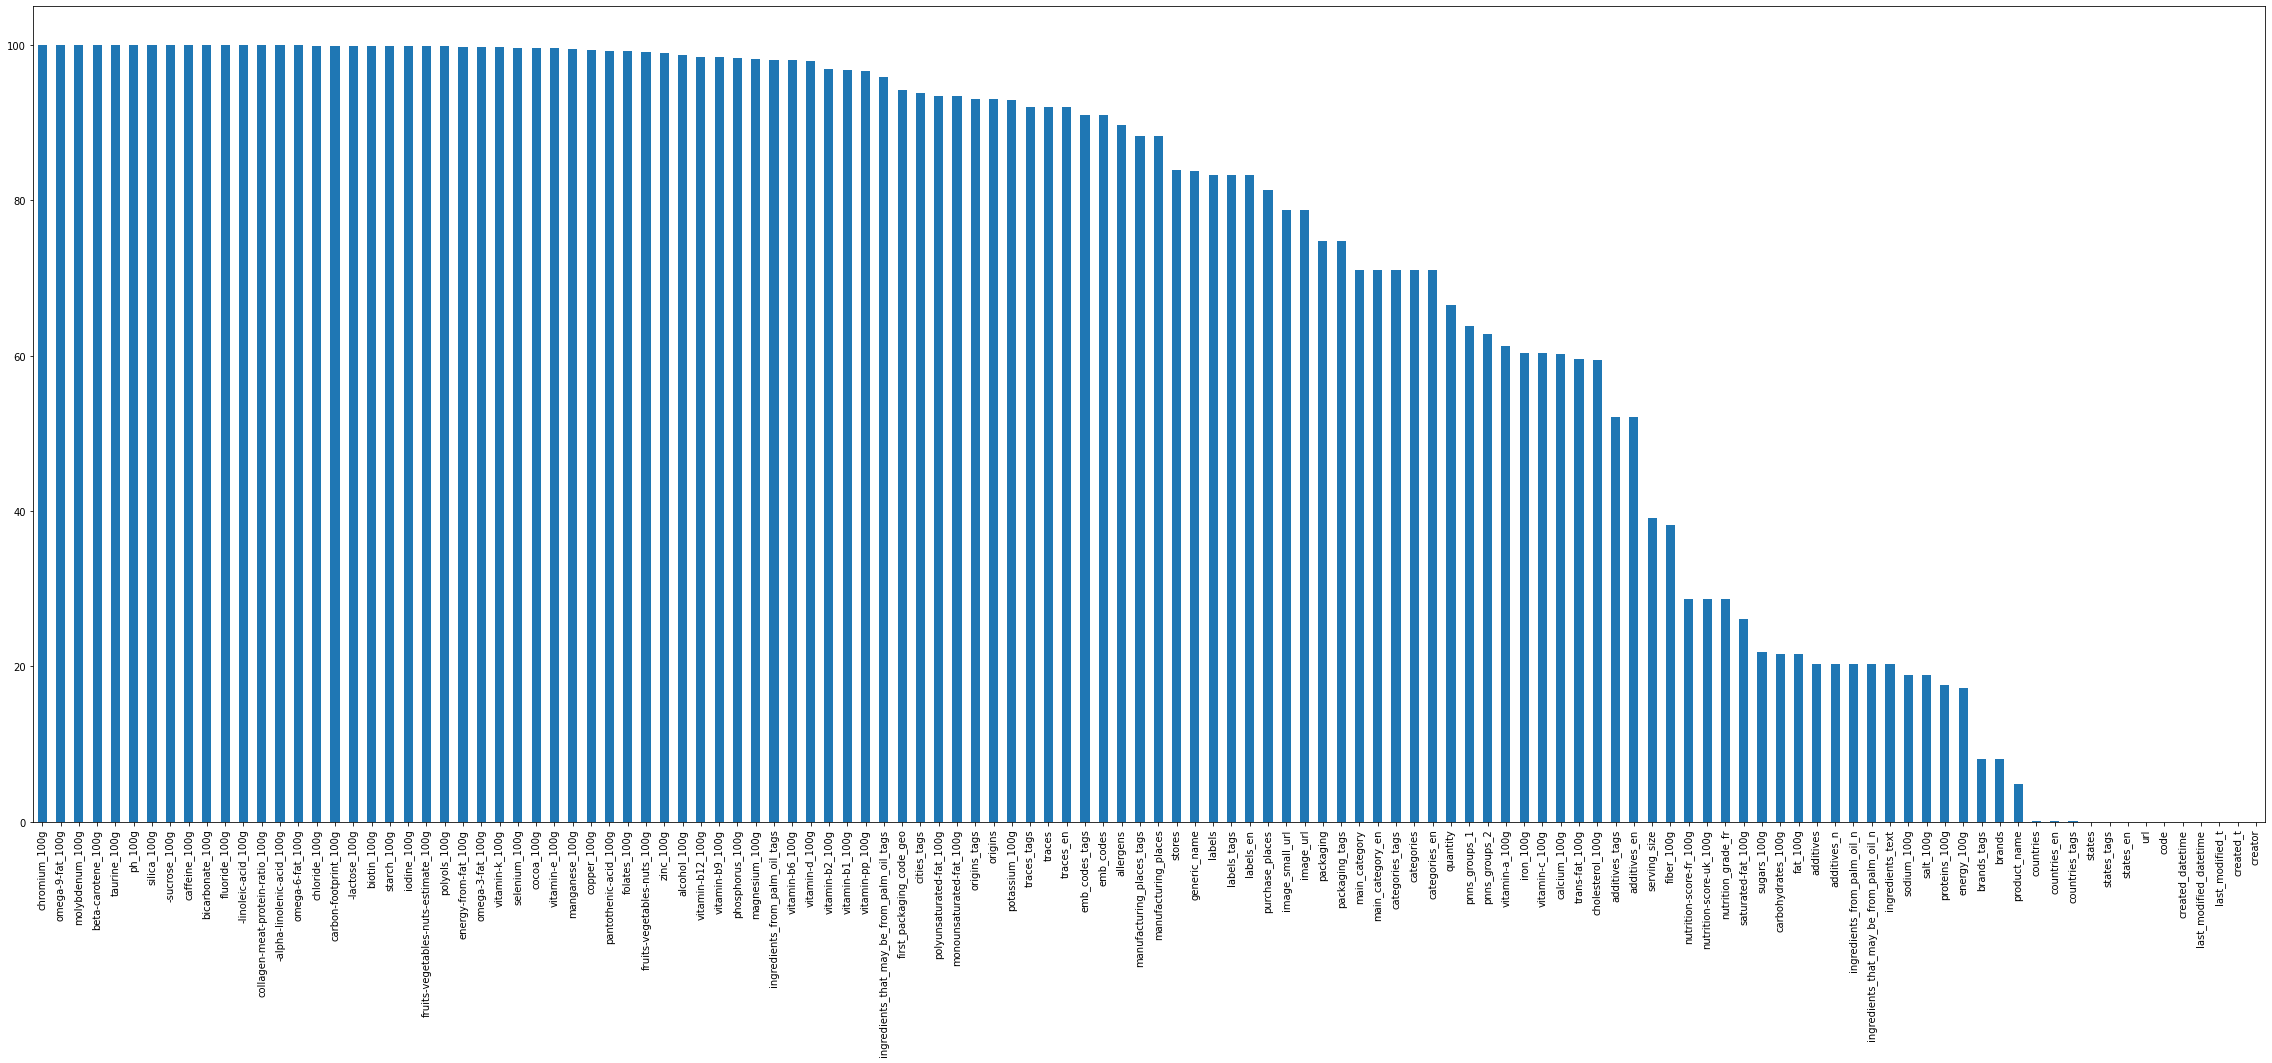

In [116]:
# print bar chart of missing values
null_percentage.plot(kind="bar", figsize=(40,15)  )
# null_percentage.plotly.iplot(kind="bar", figsize=(40,15)  )

In [122]:
missing_features = null_percentage[null_percentage > 90].index
missing_features
# len(missing_value)


Index(['chromium_100g', 'omega-9-fat_100g', 'molybdenum_100g',
       'beta-carotene_100g', 'taurine_100g', 'ph_100g', 'silica_100g',
       '-sucrose_100g', 'caffeine_100g', 'bicarbonate_100g', 'fluoride_100g',
       '-linoleic-acid_100g', 'collagen-meat-protein-ratio_100g',
       '-alpha-linolenic-acid_100g', 'omega-6-fat_100g', 'chloride_100g',
       'carbon-footprint_100g', '-lactose_100g', 'biotin_100g', 'starch_100g',
       'iodine_100g', 'fruits-vegetables-nuts-estimate_100g', 'polyols_100g',
       'energy-from-fat_100g', 'omega-3-fat_100g', 'vitamin-k_100g',
       'selenium_100g', 'cocoa_100g', 'vitamin-e_100g', 'manganese_100g',
       'copper_100g', 'pantothenic-acid_100g', 'folates_100g',
       'fruits-vegetables-nuts_100g', 'zinc_100g', 'alcohol_100g',
       'vitamin-b12_100g', 'vitamin-b9_100g', 'phosphorus_100g',
       'magnesium_100g', 'ingredients_from_palm_oil_tags', 'vitamin-b6_100g',
       'vitamin-d_100g', 'vitamin-b2_100g', 'vitamin-b1_100g',
       'vita

In [ ]:
# Drop the columns with missing values
food.drop(missing_features, axis=1, inplace=True)


# food.drop(missing_features, inplace=True, axis=1)

In [126]:
food.info()  # that means size decreases by the number of columns dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142411 entries, 347922 to 159985
Columns: 104 entries, code to water-hardness_100g
dtypes: float64(59), object(45)
memory usage: 114.1+ MB


In [127]:
food.shape


(142411, 104)

### Divide Data on the basis of missing values

- Columns with low null values (0-25%)
- Columns with medium null values (25% - 60%)
- Columnns with high null values (60% - 90%)

In [128]:
low_nan_features = null_percentage[null_percentage<=25].index
print ('Low null percentage features:', low_nan_features)

med_nan_features = null_percentage[(null_percentage>25) & (null_percentage<=60)].index
print ('Medium null percentage features:', med_nan_features)
high_nan_features = null_percentage[(null_percentage>25) & (null_percentage<=60)].index
print ('High null percentage features:', high_nan_features)

Low null percentage features: Index(['sugars_100g', 'carbohydrates_100g', 'fat_100g', 'additives',
       'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'ingredients_text',
       'sodium_100g', 'salt_100g', 'proteins_100g', 'energy_100g',
       'brands_tags', 'brands', 'product_name', 'countries', 'countries_en',
       'countries_tags', 'states', 'states_tags', 'states_en', 'url', 'code',
       'created_datetime', 'last_modified_datetime', 'last_modified_t',
       'created_t', 'creator'],
      dtype='object')
Medium null percentage features: Index(['trans-fat_100g', 'cholesterol_100g', 'additives_tags', 'additives_en',
       'serving_size', 'fiber_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'nutrition_grade_fr', 'saturated-fat_100g'],
      dtype='object')
High null percentage features: Index(['trans-fat_100g', 'cholesterol_100g', 'additives_tags', 'additives_en',
       'serving_size', 'fiber_100g', 'nutri

### Plotting Null features

In [137]:
# Lengths of the above lists
print('Length of low null percentage features:', len(low_nan_features))
print('Length of medium null percentage features:', len(med_nan_features))
print('Length of high null percentage features:', len(high_nan_features))




Length of low null percentage features: 28
Length of medium null percentage features: 10
Length of high null percentage features: 10


In [ ]:
# plotting low null features
# food[low_nan_features].plot(kind="bar", figsize=(40,15)  )  # can not be plotted

plt.figure(figsize=(40,15))
low = sns.barplot(x=low_nan_features, palette="Blues_d")

### Step 4. Type casting

In [153]:
# food['additives_n'] = food['additives_n'].astype(float64)
# food.additives.value_counts().head(5)
food['additives_n'].dtype

dtype('float64')

### Step 5. What is the number of observations in the dataset?

In [3]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


### Step6  Summary of Statistics

In [141]:
food.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_nutriments,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
additives_n,113587.0,1.885357,2.511119e+00,0.000000,0.000000,1.000000,3.000000,3.000000e+01
ingredients_from_palm_oil_n,113587.0,0.023128,1.522301e-01,0.000000,0.000000,0.000000,0.000000,2.000000e+00
ingredients_from_palm_oil,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ingredients_that_may_be_from_palm_oil_n,113587.0,0.060755,2.832913e-01,0.000000,0.000000,0.000000,0.000000,6.000000e+00
ingredients_that_may_be_from_palm_oil,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nutrition_grade_uk,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy_100g,118281.0,1126.040792,8.014916e+02,0.000000,385.000000,1096.000000,1674.000000,1.464400e+04
fat_100g,111959.0,139945.045342,4.682169e+07,0.000000,0.100000,5.330000,20.400000,1.566667e+10
saturated-fat_100g,105550.0,5.136805,8.000534e+00,0.000000,0.000000,1.800000,7.140000,1.000000e+02


### Step7 Value counts of data  (3 ways)

In [155]:
food.additives_n.value_counts().head(10)

0.0    45404
1.0    20547
2.0    15931
3.0    10193
4.0     6888
5.0     4769
6.0     3228
7.0     2139
8.0     1517
9.0      980
Name: additives_n, dtype: int64

In [156]:
food['additives_n'].value_counts().head(10)

0.0    45404
1.0    20547
2.0    15931
3.0    10193
4.0     6888
5.0     4769
6.0     3228
7.0     2139
8.0     1517
9.0      980
Name: additives_n, dtype: int64

In [158]:
food.additives_n.to_list()

[1.0,
 nan,
 1.0,
 5.0,
 nan,
 nan,
 5.0,
 1.0,
 5.0,
 0.0,
 3.0,
 nan,
 nan,
 2.0,
 1.0,
 0.0,
 3.0,
 1.0,
 0.0,
 nan,
 5.0,
 9.0,
 5.0,
 7.0,
 nan,
 nan,
 nan,
 nan,
 8.0,
 nan,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 3.0,
 2.0,
 0.0,
 0.0,
 0.0,
 nan,
 3.0,
 3.0,
 nan,
 0.0,
 2.0,
 0.0,
 1.0,
 0.0,
 1.0,
 nan,
 nan,
 3.0,
 1.0,
 1.0,
 10.0,
 0.0,
 2.0,
 nan,
 3.0,
 1.0,
 nan,
 0.0,
 4.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 4.0,
 1.0,
 1.0,
 7.0,
 3.0,
 nan,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 8.0,
 2.0,
 0.0,
 6.0,
 6.0,
 0.0,
 4.0,
 2.0,
 1.0,
 0.0,
 2.0,
 nan,
 8.0,
 5.0,
 0.0,
 nan,
 nan,
 1.0,
 1.0,
 4.0,
 0.0,
 0.0,
 11.0,
 3.0,
 4.0,
 2.0,
 3.0,
 11.0,
 nan,
 0.0,
 6.0,
 nan,
 1.0,
 0.0,
 nan,
 7.0,
 2.0,
 nan,
 nan,
 0.0,
 0.0,
 nan,
 nan,
 0.0,
 nan,
 1.0,
 4.0,
 4.0,
 1.0,
 2.0,
 0.0,
 nan,
 1.0,
 1.0,
 0.0,
 2.0,
 0.0,
 6.0,
 0.0,
 2.0,
 nan,
 1.0,
 nan,
 0.0,
 0.0,
 1.0,
 4.0,
 0.0,
 0.0,
 3.0,
 3.0,
 nan,
 0.0,
 1.0,
 0.0,
 4.0,
 0.0,
 1.0,
 

### Step8 Duplicates


In [159]:
food.drop_duplicates(inplace=True)
print('Shape of data after dropping duplicates:', food.shape)

Shape of data after dropping duplicates: (142411, 104)


### Step9 Normality of data

<Figure size 20000x7500 with 0 Axes>

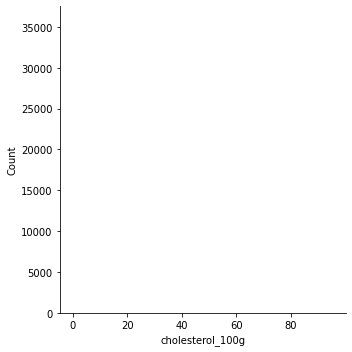

In [173]:
plt.figure(figsize=(40,15), dpi=500)
sns.displot(food['cholesterol_100g'], palette="Blues_d")

<Figure size 20000x7500 with 0 Axes>

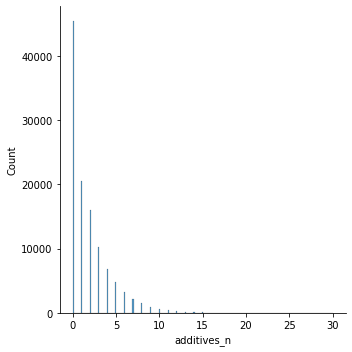

In [174]:
plt.figure(figsize=(40,15), dpi=500)
sns.displot(food['additives_n'], palette="Blues_d")

### Step10 Correlation

<AxesSubplot:>

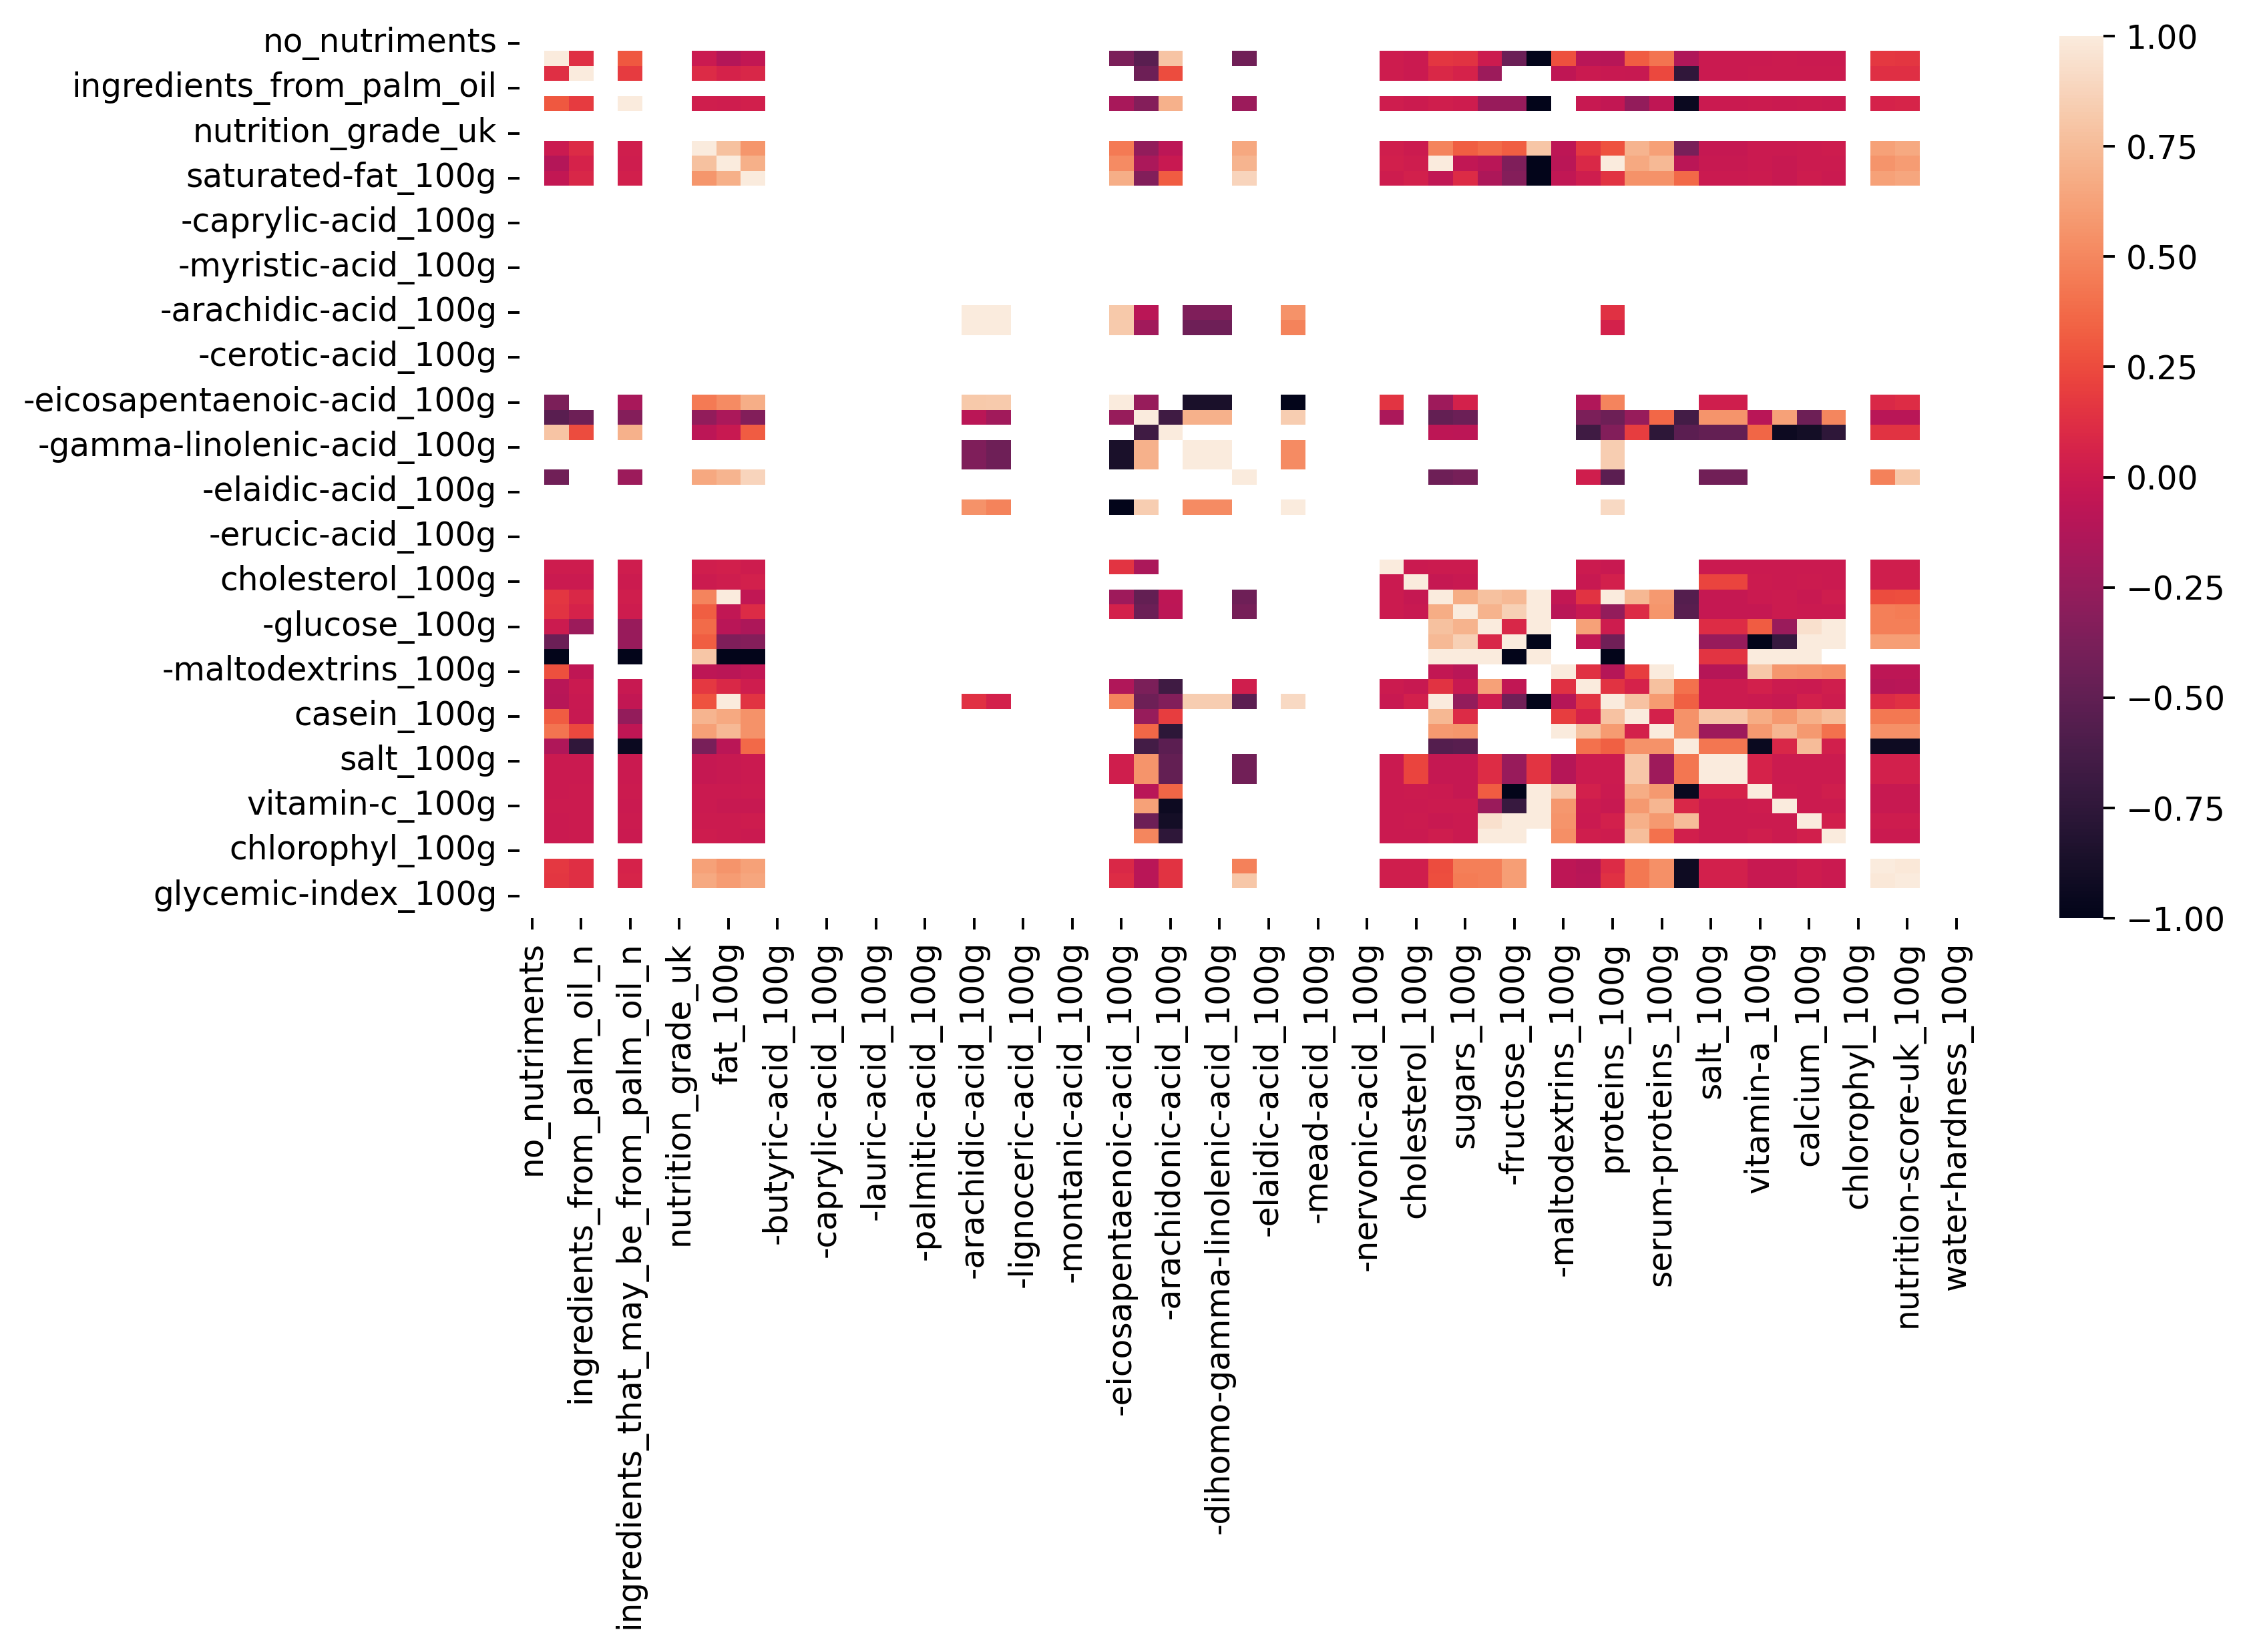

In [182]:
plt.figure(figsize=(10,5), dpi=350)
sns.heatmap(food.corr())

In [196]:
food_corr = food.corr()
food_corr

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,fat_100g,saturated-fat_100g,...,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,chlorophyl_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
no_nutriments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
additives_n,NaN,1.000000,0.128838,NaN,0.297950,NaN,NaN,-0.003698,-0.112434,-0.046429,...,-0.006039,-0.003083,0.001118,-0.002142,-0.005113,NaN,0.165071,0.162304,NaN,NaN
ingredients_from_palm_oil_n,NaN,0.128838,1.000000,NaN,0.185854,NaN,NaN,0.107148,0.061069,0.085458,...,-0.003964,0.000170,0.000055,0.001317,0.001987,NaN,0.126070,0.129327,NaN,NaN
ingredients_from_palm_oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ingredients_that_may_be_from_palm_oil_n,NaN,0.297950,0.185854,NaN,1.000000,NaN,NaN,0.029653,0.018228,0.035097,...,-0.006918,0.000310,-0.000830,0.000700,-0.002070,NaN,0.061836,0.064026,NaN,NaN
ingredients_that_may_be_from_palm_oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nutrition_grade_uk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy_100g,NaN,-0.003698,0.107148,NaN,0.029653,NaN,NaN,1.000000,0.777526,0.564457,...,-0.030279,-0.007260,-0.003936,0.005487,0.015275,NaN,0.622099,0.659812,NaN,NaN
fat_100g,NaN,-0.112434,0.061069,NaN,0.018228,NaN,NaN,0.777526,1.000000,0.693661,...,-0.017474,-0.004563,-0.022780,0.005852,0.002095,NaN,0.557359,0.597154,NaN,NaN
saturated-fat_100g,NaN,-0.046429,0.085458,NaN,0.035097,NaN,NaN,0.564457,0.693661,1.000000,...,-0.002762,0.003486,-0.020293,0.015367,-0.002128,NaN,0.621569,0.645168,NaN,NaN


### Step 6. What is the number of columns in the dataset?

In [186]:
food.shape[1]

104

### Step 7. Print the name of all the columns.

In [187]:
food.columns.to_list()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'cities',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_en',
 'main_category',
 'main_category_en',
 'image_url',
 'image_small_url',
 'energy_100g',
 'fat_100g',
 'saturated-fat

### Step 8. What is the name of 105th column?

In [202]:
food.iloc[100:400, 103:104]
# food.shape

,water-hardness_100g
86372,NaN
31396,NaN
32310,NaN
223979,NaN
193519,NaN
...,...
346649,NaN
253182,NaN
29129,NaN
286236,NaN


### Step 9. What is the type of the observations of the 105th column?

In [203]:
food.iloc[100:400, 103:104].dtypes

water-hardness_100g    float64
dtype: object

### Step 10. How is the dataset indexed?

In [193]:
food.index

Int64Index([347922, 112637, 136356,  59746, 293857, 352762,  22195, 338633,
            259037, 263362,
            ...
            345682, 309537, 305366, 210069, 225673, 172285,  29167, 190992,
            130101, 159985],
           dtype='int64', length=142411)

### Step 11. What is the product name of the 19th observation?

In [204]:
food.iloc[17:18, 0:1]

,code
209460,3227061000115
